# Model to predict salary bracket for tech workers

In [1]:
# look at notes from ZTM gh to annotate
# should we do classifier or regression model?
# given parameters about a perspn, can we determine which salary bracket they belong in?

# what accuracy do we need?
# speed may be more important than accuracy if we're a social networking site

# ideas
# big city? boolean data pt, or fortune 500 company? data point
### use data analysis to make sure theyre related if you add them
# remove outliers
# switch to regression
# random search and grid search
# change random seed
# put all code in vscode with copilot at the end for pep8 etc suggestions
# add graphs throughout like while exploring data to make communicative visuals (plot columns against target, etc.)
# rewrite everything obviosuyl
# does location matter? big city instead?


# steps
# change data set to be bracket-based and resave either into new csv or dataframe
# clean data if necessary
# make data numeric if you want
# shuffle and split data
# model and fit data
# evaluate and tune

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# make visualizations appear inside notebook
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, plot_roc_curve


In [3]:
df = pd.read_csv("./data/salary_data_US_outliers_removed.csv")
df

,company,title,annualcomp,location,yearsofexperience,yearsatcompany,education
0,Yandex,Software Engineer,15000,"Moscow Mills, MO",4.0,4.0,Highschool
1,Accenture,Data Scientist,16000,"Indianapolis, IN",0.0,0.0,Bachelor's Degree
2,Microsoft,Product Manager,18000,"Seattle, WA",0.0,0.0,Some College
3,Ansys,Software Engineer,21000,"Canonsburg, PA",1.0,1.0,Bachelor's Degree
4,Capital One,Software Engineer,27000,"New York, NY",0.0,0.0,Bachelor's Degree
...,...,...,...,...,...,...,...
24413,Google,Software Engineering Manager,1355000,"Mountain View, CA",15.0,12.0,Master's Degree
24414,Snap,Software Engineering Manager,1400000,"Los Angeles, CA",5.0,4.0,Bachelor's Degree
24415,Snap,Software Engineering Manager,1407000,"Seattle, WA",22.0,5.0,Master's Degree
24416,Broadcom,Marketing,1470000,"San Jose, CA",21.0,9.0,Master's Degree


In [4]:
df_bracketed = df
df_bracketed

,company,title,annualcomp,location,yearsofexperience,yearsatcompany,education
0,Yandex,Software Engineer,15000,"Moscow Mills, MO",4.0,4.0,Highschool
1,Accenture,Data Scientist,16000,"Indianapolis, IN",0.0,0.0,Bachelor's Degree
2,Microsoft,Product Manager,18000,"Seattle, WA",0.0,0.0,Some College
3,Ansys,Software Engineer,21000,"Canonsburg, PA",1.0,1.0,Bachelor's Degree
4,Capital One,Software Engineer,27000,"New York, NY",0.0,0.0,Bachelor's Degree
...,...,...,...,...,...,...,...
24413,Google,Software Engineering Manager,1355000,"Mountain View, CA",15.0,12.0,Master's Degree
24414,Snap,Software Engineering Manager,1400000,"Los Angeles, CA",5.0,4.0,Bachelor's Degree
24415,Snap,Software Engineering Manager,1407000,"Seattle, WA",22.0,5.0,Master's Degree
24416,Broadcom,Marketing,1470000,"San Jose, CA",21.0,9.0,Master's Degree


In [5]:
# change data in dataframe to be a bracket
df_bracketed["annualcomp"] = np.where(df_bracketed["annualcomp"].between(0,30000), 0, df_bracketed['annualcomp'])
df_bracketed["annualcomp"] = np.where(df_bracketed["annualcomp"].between(30000,60000), 1, df_bracketed['annualcomp'])
df_bracketed["annualcomp"] = np.where(df_bracketed["annualcomp"].between(60000,100000), 2, df_bracketed['annualcomp'])
df_bracketed["annualcomp"] = np.where(df_bracketed["annualcomp"].between(100000,150000), 3, df_bracketed['annualcomp'])
df_bracketed["annualcomp"] = np.where(df_bracketed["annualcomp"].between(150000,200000), 4, df_bracketed['annualcomp'])
df_bracketed["annualcomp"] = np.where(df_bracketed["annualcomp"].between(200000,300000), 5, df_bracketed['annualcomp'])
df_bracketed["annualcomp"] = np.where(df_bracketed["annualcomp"].between(300000,500000), 6, df_bracketed['annualcomp'])
df_bracketed["annualcomp"] = np.where(df_bracketed["annualcomp"].between(500000,1000000), 7, df_bracketed['annualcomp'])
df_bracketed["annualcomp"] = np.where(df_bracketed["annualcomp"].between(1000000,2000000), 8, df_bracketed['annualcomp'])
df_bracketed

,company,title,annualcomp,location,yearsofexperience,yearsatcompany,education
0,Yandex,Software Engineer,0,"Moscow Mills, MO",4.0,4.0,Highschool
1,Accenture,Data Scientist,0,"Indianapolis, IN",0.0,0.0,Bachelor's Degree
2,Microsoft,Product Manager,0,"Seattle, WA",0.0,0.0,Some College
3,Ansys,Software Engineer,0,"Canonsburg, PA",1.0,1.0,Bachelor's Degree
4,Capital One,Software Engineer,0,"New York, NY",0.0,0.0,Bachelor's Degree
...,...,...,...,...,...,...,...
24413,Google,Software Engineering Manager,8,"Mountain View, CA",15.0,12.0,Master's Degree
24414,Snap,Software Engineering Manager,8,"Los Angeles, CA",5.0,4.0,Bachelor's Degree
24415,Snap,Software Engineering Manager,8,"Seattle, WA",22.0,5.0,Master's Degree
24416,Broadcom,Marketing,8,"San Jose, CA",21.0,9.0,Master's Degree


In [6]:
# how many in each class?
df_bracketed["annualcomp"].value_counts()

5    7221
4    6241
3    4585
6    3796
2    1608
7     851
1      71
8      39
0       6
Name: annualcomp, dtype: int64

<AxesSubplot:>

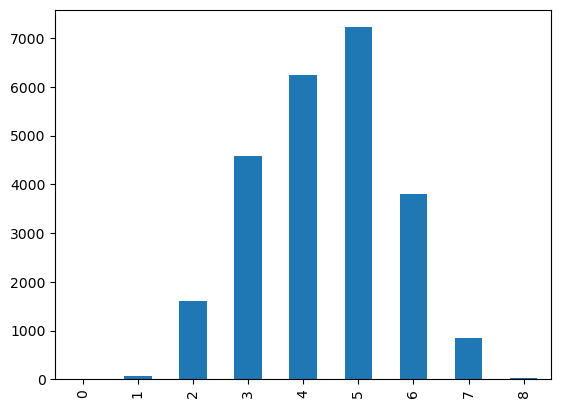

In [7]:
# see distribution of salary brackets(target variable)
df_bracketed["annualcomp"].value_counts().sort_index().plot(kind="bar")

In [8]:
# do a grpah here or somehting idk. comapre two columns as x and y
# look for trends
# exploratory data analysis

In [9]:
# use graphs to see how related a column is to target. are any irrelevant?

In [10]:
# fix the target column
#df_bracketed.annualcomp = df_bracketed.annualcomp.astype(str)
#df_bracketed["annualcomp"] = df_bracketed["annualcomp"].replace(['0'], '<$30k')
#df_bracketed["annualcomp"] = df_bracketed["annualcomp"].replace(['1'], '$30k-60k')
#df_bracketed["annualcomp"] = df_bracketed["annualcomp"].replace(['2'], '$60k-100k')
#df_bracketed["annualcomp"] = df_bracketed["annualcomp"].replace(['3'], '$100k-150k')
#df_bracketed["annualcomp"] = df_bracketed["annualcomp"].replace(['4'], '$150k-200k')
#df_bracketed["annualcomp"] = df_bracketed["annualcomp"].replace(['5'], '$200k-300k')
#df_bracketed["annualcomp"] = df_bracketed["annualcomp"].replace(['6'], '$300k-500k')
#df_bracketed["annualcomp"] = df_bracketed["annualcomp"].replace(['7'], '$500k-1mil')
#df_bracketed["annualcomp"] = df_bracketed["annualcomp"].replace(['8'], '>$1mil')
#df_bracketed

In [11]:
# split data into X and y

X = df_bracketed.drop("annualcomp", axis=1)
y = df_bracketed["annualcomp"]

In [12]:
# make sure its all numerical for model fitting

str_features = ['company', 'title', 'location', 'education']

encoder = OneHotEncoder()

transformer = ColumnTransformer([('encoder', encoder, str_features)], remainder='passthrough')

transformed_X = transformer.fit_transform(X)

In [13]:
# split into training and test set

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

In [16]:
# we're going to try
# logistic regression, k nearest neighbor, and random forest

# put them ina dict
models = {'Logistic Regression': LogisticRegression(),
          'KNN': KNeighborsClassifier(),
          'Random Forest': RandomForestClassifier()}

# create a function to fit and score models
def fit_eval_models(models, X_train, X_test, y_train, y_test):
    # fit and evaluate given ml models from models dict
    # give test and training data for X and y
    
    np.random.seed(42)
    
    # dict to contain scores
    model_scores = {}
    
    # loop thru models and train/test each
    for name, model in models.items():
        model.fit(X_train, y_train)
        # append score to scores dict
        model_scores[name] = model.score(X_test,y_test)
        
    return model_scores

In [17]:
model_scores = fit_eval_models(models=models, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
model_scores

/Users/annie/Documents/Programming/MachineLearning/SalaryPrediction/conda_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.48382473382473384,
 'KNN': 0.46253071253071254,
 'Random Forest': 0.5317362817362817}